<a href="https://colab.research.google.com/github/josephcabezas/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset is credit card transaction in sep 2013 by european card holders
# the goal is utilize outlier detection methodologies to find fraud transactions
# will use tukey's IQRmethod, standard deviation, z-score, modified z-score, isolation forest, DBSCAN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
df_raw = pd.read_csv('creditcard.csv')
df_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df=df_raw.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# define list of features
feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', \
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', \
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

<ipython-input-6-623ab8a0d6bc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x='Class', y='V17', palette='Spectral')
<ipython-input-6-623ab8a0d6bc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=df, x='Class', y='V10', palette='Spectral')
<ipython-input-6-623ab8a0d6bc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 2], data=df, x='Class', y='V12', palette='Spectral')
<ipython-input-6-623ab8a0d6bc>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

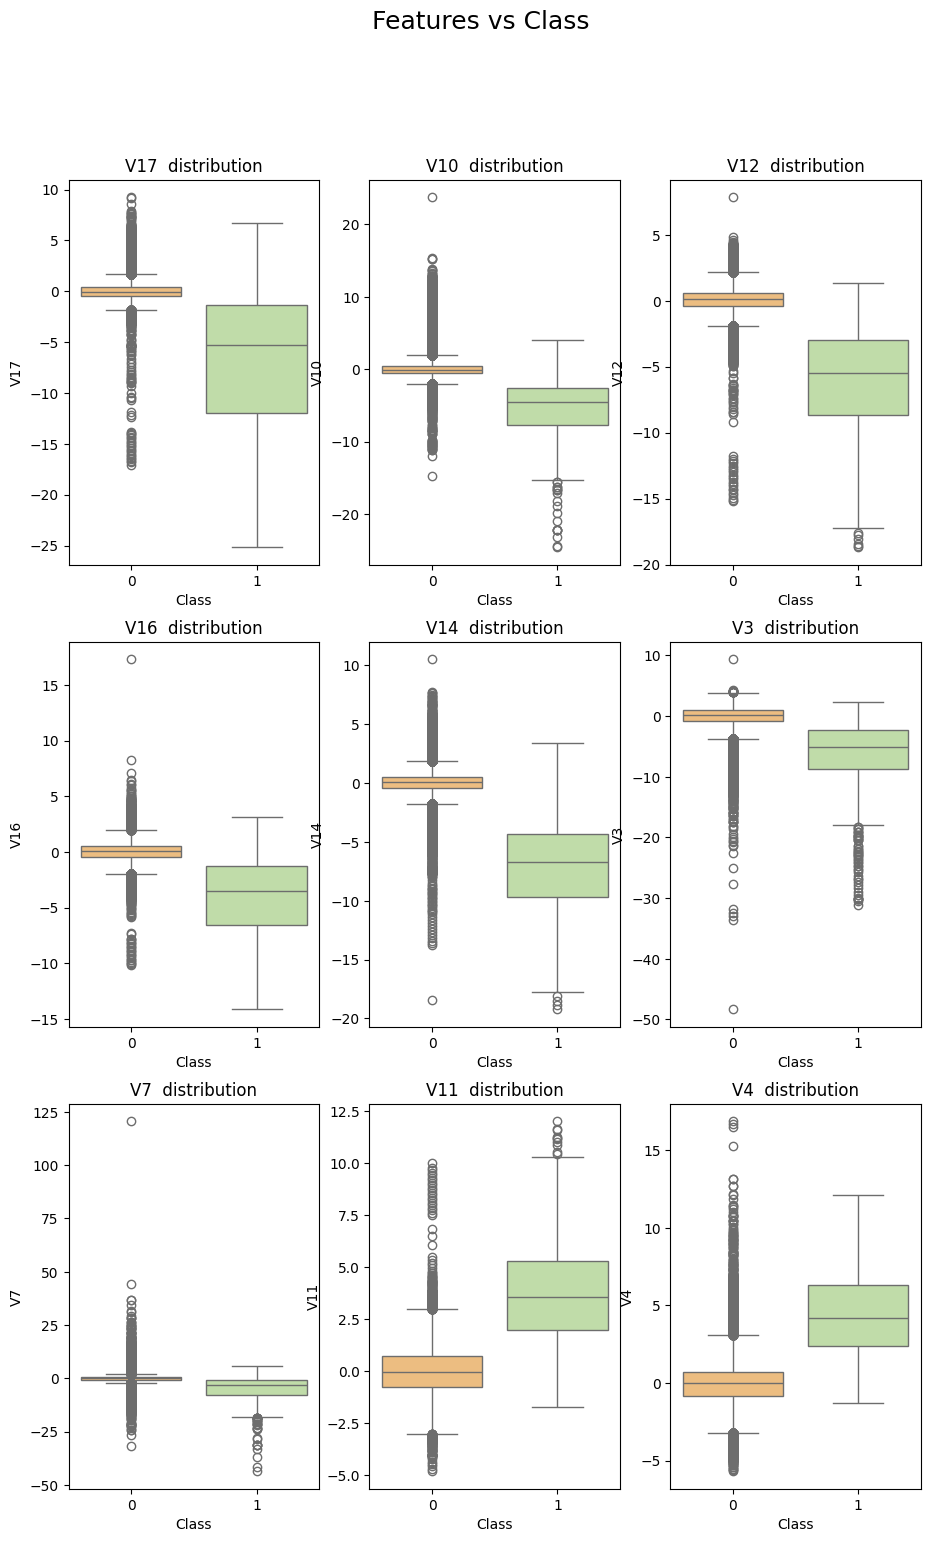

In [6]:
#boxplot visualizations

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(11,17))
fig.suptitle('Features vs Class', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='Class', y='V17', palette='Spectral')
axes[0, 0].set_title('V17  distribution')

sns.boxplot(ax=axes[0, 1], data=df, x='Class', y='V10', palette='Spectral')
axes[0, 1].set_title('V10  distribution')

sns.boxplot(ax=axes[0, 2], data=df, x='Class', y='V12', palette='Spectral')
axes[0, 2].set_title('V12  distribution')

sns.boxplot(ax=axes[1, 0], data=df, x='Class', y='V16', palette='Spectral')
axes[1, 0].set_title('V16  distribution')

sns.boxplot(ax=axes[1, 1], data=df, x='Class', y='V14', palette='Spectral')
axes[1, 1].set_title('V14  distribution')

sns.boxplot(ax=axes[1, 2], data=df, x='Class', y='V3', palette='Spectral')
axes[1, 2].set_title('V3  distribution')

sns.boxplot(ax=axes[2, 0], data=df, x='Class', y='V7', palette='Spectral')
axes[2, 0].set_title('V7  distribution')

sns.boxplot(ax=axes[2, 1], data=df, x='Class', y='V11', palette='Spectral')
axes[2, 1].set_title('V11  distribution')

sns.boxplot(ax=axes[2, 2], data=df, x='Class', y='V4', palette='Spectral')
axes[2, 2].set_title('V4  distribution')

plt.tight_layout

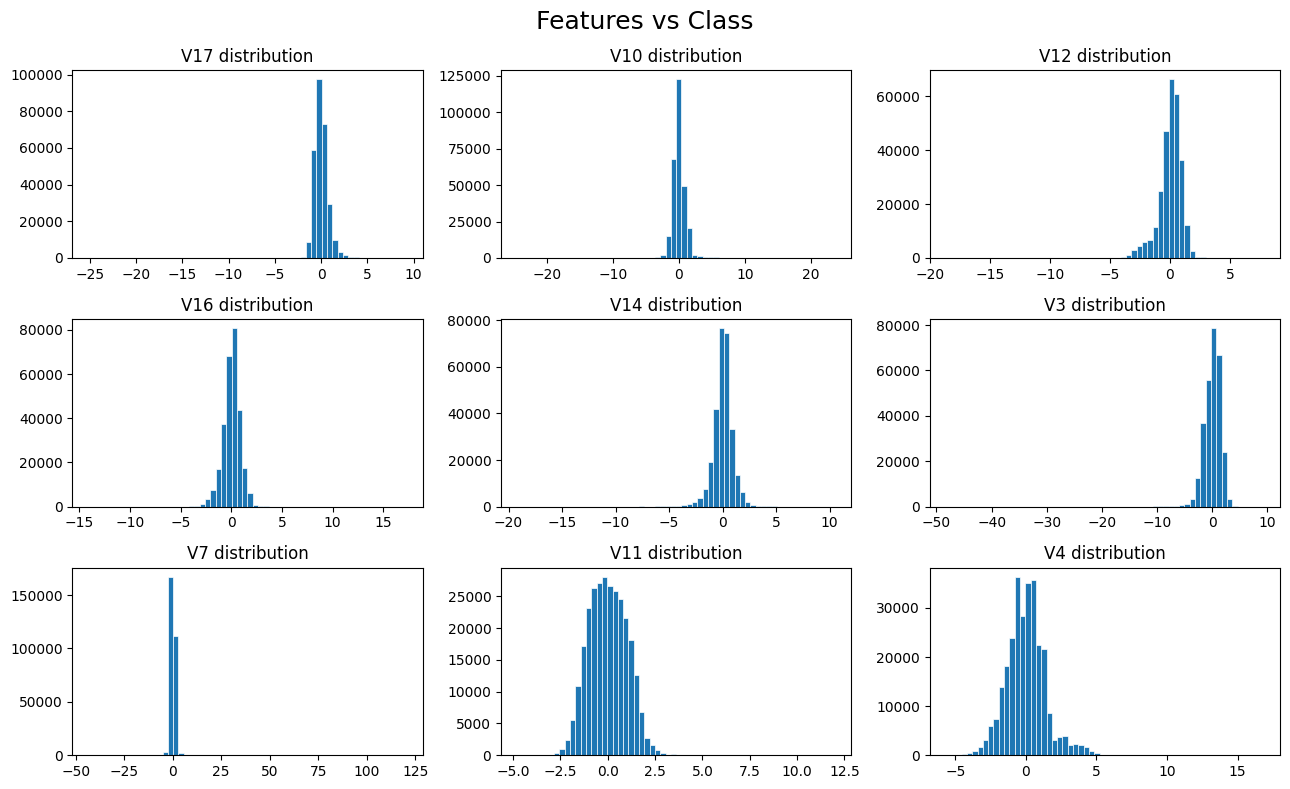

In [9]:
# histogram visualization
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13,8))
fig.suptitle('Features vs Class', size = 18)

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [ ]:
"""
Tukey's IQR Method
1. find first quartile, Q1
2. find third quartile, Q3
3. find interquartile range, IQR = Q3 - Q1
4. define normal data range as:
      lower limit = Q1 - 1.5 IGR
      upper limit = Q3 + 1.5 IQR
5. find outliers, which is any point outside of this range
"""